In [8]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [9]:
customers.head()
products.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [10]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [11]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [12]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

In [13]:
final_data = pd.merge(merged_data, products, on='ProductID')

In [14]:
final_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [15]:
final_data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


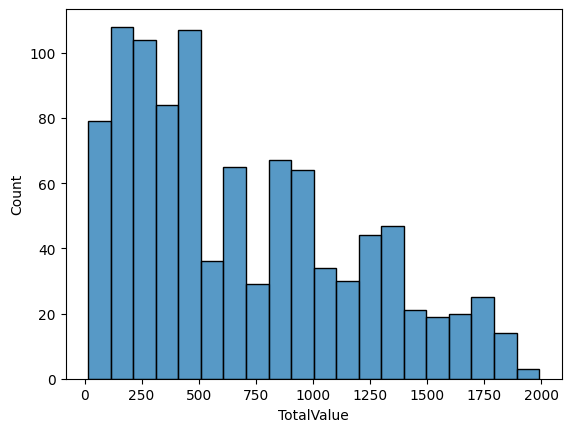

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(final_data['TotalValue'], bins=20)
plt.show()

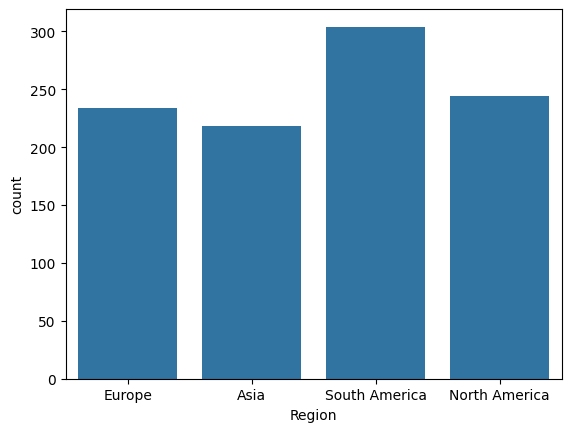

In [17]:
sns.countplot(x='Region', data=final_data)
plt.show()

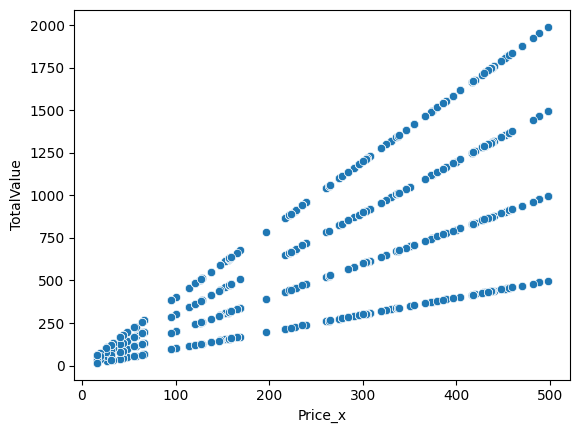

In [19]:
sns.scatterplot(x='Price_x', y='TotalValue', data=final_data)
plt.show()

In [21]:
final_data['TransactionDate'] = pd.to_datetime(final_data['TransactionDate'])

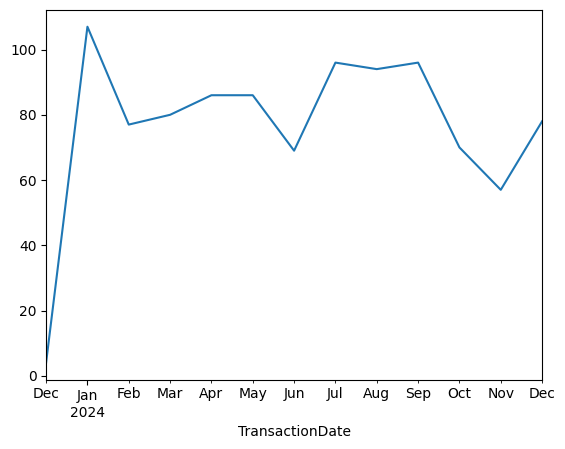

In [23]:
final_data.set_index('TransactionDate').resample('ME').size().plot()
plt.show()

In [24]:
final_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


In [25]:
final_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

,TotalValue
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


In [26]:
final_data['SignupDate'] = pd.to_datetime(final_data['SignupDate'])
final_data['TimeToFirstPurchase'] = (final_data['TransactionDate'] - final_data['SignupDate']).dt.days

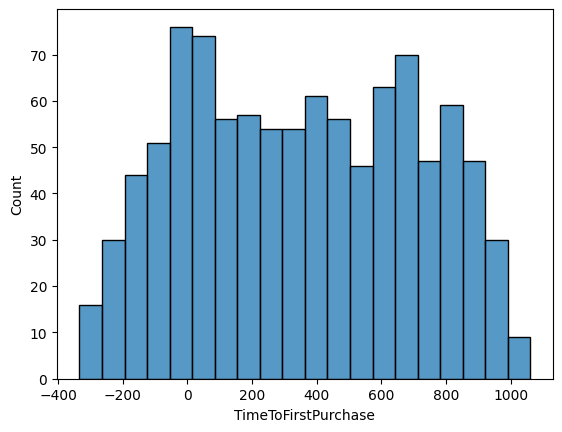

In [27]:
sns.histplot(final_data['TimeToFirstPurchase'], bins=20)
plt.show()

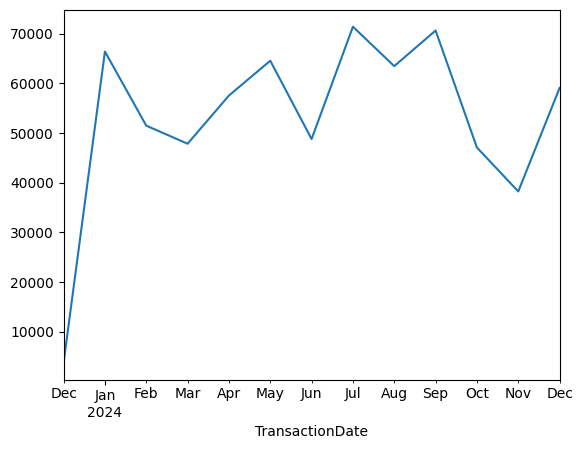

In [30]:
final_data.set_index('TransactionDate').resample('ME')['TotalValue'].sum().plot()
plt.show()

In [32]:
top_customers = final_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [33]:
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


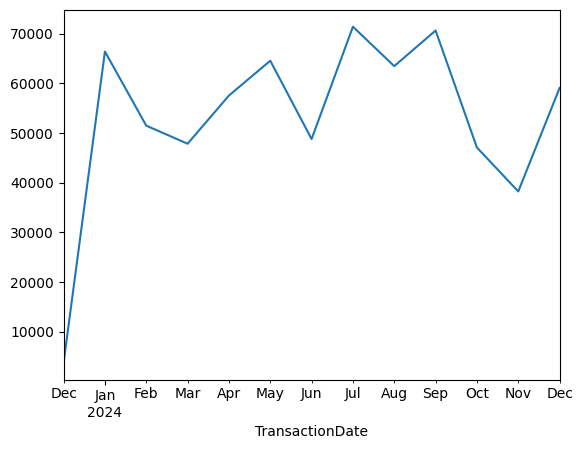

In [34]:
final_data.set_index('TransactionDate').resample('ME')['TotalValue'].sum().plot()
plt.show()